# Потьомкін Лев, К-27, Варіант 11

## 1. Чисельне інтегрування, метод трапецій

Якщо у квадратурнiй формулi замк-неного типу взяти $n = 1$, то отримаємо формулу трапецiй:

$$ \int_a^b f(x) dx \approx \dfrac{f(a) + f(b)}{2}(b-a) $$

Оцінка залишкового члена:

$$ | R(f) | \leq \dfrac{M_2 (b-a) h^2}{12} $$

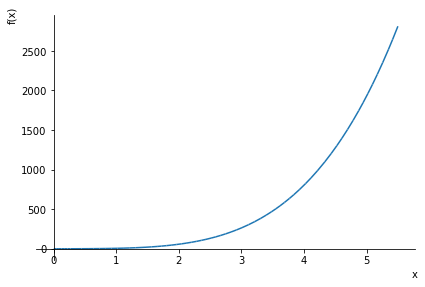

Step: 0.0014


In [96]:
import numpy as np
from sympy import *

# set integration limits
EPS = 1e-3
a = 0
b = 5.5

# define the function
x, y = var('x, y')
f = 3*x**4 + 2*x**2 + x
plot(f, (x, a, b))

# calculate step length
M2 = 1093
assert M2 == f.diff(x, 2).subs(x, b)
step = sqrt(12 * EPS / (M2 * (b-a)))

print(f"Step: {step:.4f}")

In [85]:
def trapezoid_method(f, limits, step):
    result = 0
    a, b = limits
    
    for x in np.arange(a, b, step):
        result += f(x) + f(x+step)
    
    return result * step / 2

numeric = trapezoid_method(lambdify(x, f), (a, b), step=0.001)
symbolic = integrate(f, (x, a, b))

print(f"Numeric  integration result: {numeric:.5f}") 
print(f"Symbolic integration result: {symbolic:.5f}") 

Numeric  integration result: 3145.74808
Symbolic integration result: 3145.74792


## 2. Розв'язання систем нелінійних рівнянь, метод Ньютона

Лінеаризуючи рівняння $\vec{F}(\vec{x}) = 0$ в околі наближення до розв'язку $\vec{x}$ отримуємо СЛАР відносно нового наближення $\vec{x}^{k+1}$:

$$ \vec{F}(\vec{x}^k) + F'(\vec{x}^k)(\vec{x}^{k+1} - \vec{x}^k) = 0 $$

Алгоритм:
- задати початкове наближення $\vec{x}^0$
- обчислити матрицю Якобі $A_k(\vec{x}^k)$
- розв'язати СЛАР $A_k\vec{z}^k = \vec{F}(\vec{x}^k)$
- обчислити нове наближення $\vec{x}^{k+1} = \vec{x}^k - \vec{z}^k$
- перевірити умову $||\vec{z}|| < \varepsilon$, якщо її виконано, припинити процес

In [92]:
x_i = Matrix([1.25, 0])

F = Matrix([
    tan(x*y + 0.1) - x**2,
    x**2 + 2*y**2 - 1
])

J = F.jacobian([x, y])

while True:
    s = { x: x_i[0], y: x_i[1] }
    z = J.subs(s).solve(F.subs(s))
    x_i -= z

    if z.norm() < EPS: break

print(f"x = {x_i[0].n(4)}")
print(f"y = {x_i[1].n(4)}")

x = 0.6981
y = 0.5063


## 3. Знаходження власних чисел, метод обертання Якобі

Метод полягає у виконанні ортогональних перетворень, вихідної матриці $А$, що зводять її до діагонального виду $\Lambda = UAU^T$, де $\Lambda = \text{diag}(\lambda_i)$, $\lambda_i$ - власні числа

In [159]:
A = Matrix([
    [2, 1, 0],
    [1, 2, 1],
    [0, 1, 2]
])

def find_max_nondiagonal(A):
    n, m = A.shape
    maxi = maxj = 0
    a = -float('inf')
    for i in range(n):
        for j in range(m):
            if i == j: continue
            if A[i, j] > a:
                a = A[i, j]
                maxi, maxj = i, j
    return maxi, maxj

def calculate_phi(A, i, j):
    if A[i, i] == A[j, j]:
        return pi / 4
    h = 2*A[i, j] / (A[i, i] - A[j, j])
    return atan(h) / 2

def construct_U(A, i, j, phi):
    n, _ = A.shape
    U = Matrix.eye(n)
    U[i, i] = cos(phi)
    U[j, j] = cos(phi)
    U[i, j] = sin(phi)
    U[j, i] = -sin(phi)
    return U

def t(A):
    n, m = A.shape
    s = 0
    for i in range(n):
        for j in range(m):
            if i == j: continue
            s += A[i, j]**2
    return s

def jacobi_method(A):
    while True:
        i, j = find_max_nondiagonal(A)
        phi = calculate_phi(A, i, j).n(10)
        U = construct_U(A, i, j, phi)
        A = U*A*U.T
        if t(A) < EPS: break
            
    return A.diagonal()
    
    
numeric = jacobi_method(A).n(5)
symbolic = [x.n(5) for x in A.eigenvals().keys()]

print("Numerically  calculated:", sorted(numeric))
print("Symbolically calculated:", sorted(symbolic))

Numerically  calculated: [0.58599, 1.9998, 3.4142]
Symbolically calculated: [0.58579, 2.0000, 3.4142]
